In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score,roc_auc_score,confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [40]:
data=pd.read_csv("titanic_train.csv")

In [41]:
df=data.copy()

# EDA

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
df.shape

(891, 12)

In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Visualization

1. ### Visualization with Seaborn

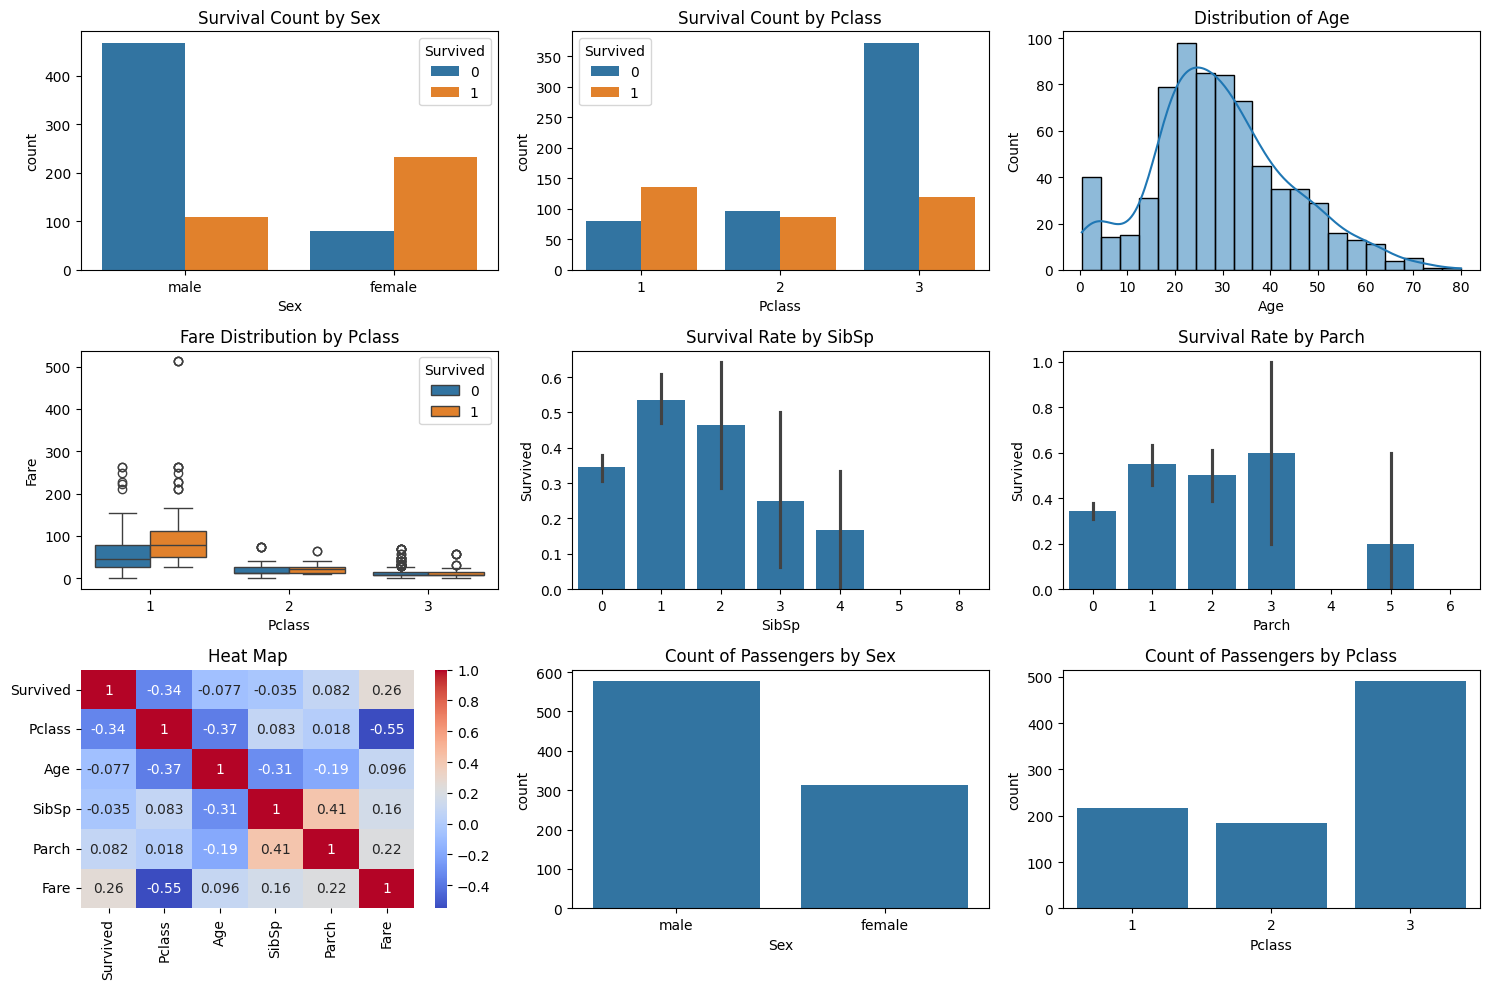

In [47]:
plt.figure(figsize=(15, 10))

# 1. Sex by Survived
plt.subplot(3, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Sex')

# 2. Pclass by Survived
plt.subplot(3, 3, 2)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass')

# 3. Age Distribution
plt.subplot(3, 3, 3)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')

# 4. Pclass by Fare
plt.subplot(3, 3, 4)
sns.boxplot(x='Pclass', y='Fare', data=df, hue='Survived')
plt.title('Fare Distribution by Pclass')

# 5. SibSp by Survived
plt.subplot(3, 3, 5)
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by SibSp')

# 6. Parch by Survived
plt.subplot(3, 3, 6)
sns.barplot(x='Parch', y='Survived', data=df)
plt.title('Survival Rate by Parch')

# 7. Heatmap
plt.subplot(3, 3, 7)
corr_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heat Map')

# 8. Sex
plt.subplot(3, 3, 8)
sns.countplot(x='Sex', data=df)
plt.title('Count of Passengers by Sex')

# 9. Pclass
plt.subplot(3, 3, 9)
sns.countplot(x='Pclass', data=df)
plt.title('Count of Passengers by Pclass')

plt.tight_layout()
plt.show()

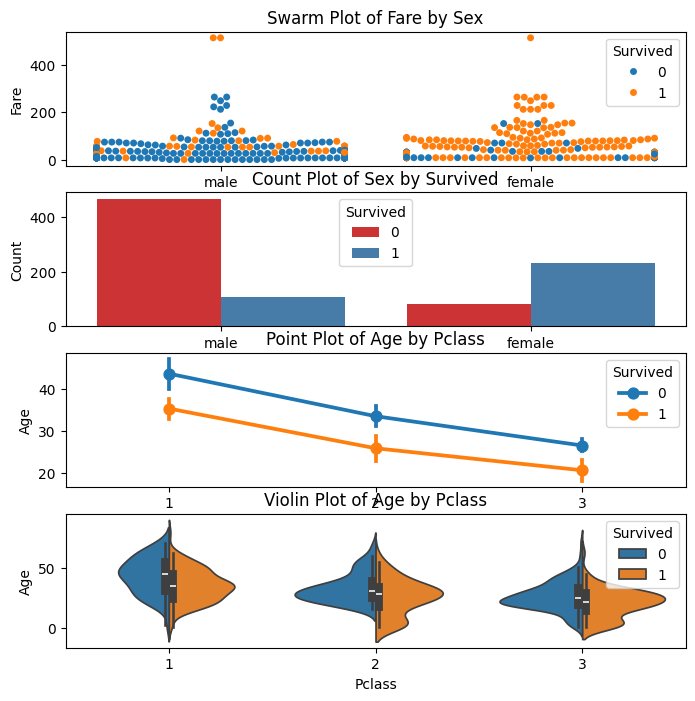

In [48]:
plt.figure(figsize=(8, 8))


# 1. Sex by Fare
plt.subplot(4, 1, 1)
sns.swarmplot(x='Sex', y='Fare', data=df, hue='Survived')
plt.title('Swarm Plot of Fare by Sex')

# 2. Sex by Survived

plt.subplot(4, 1, 2)
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')

plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count Plot of Sex by Survived')


# 3. Pclass by Age
plt.subplot(4, 1, 3)
sns.pointplot(x='Pclass', y='Age', data=df, hue='Survived')
plt.title('Point Plot of Age by Pclass')

# 4. Pclass by Age
plt.subplot(4, 1, 4)
sns.violinplot(x='Pclass', y='Age', data=df, hue='Survived', split=True)
plt.title('Violin Plot of Age by Pclass')


plt.show()

2. ### Visualization with matplotlib

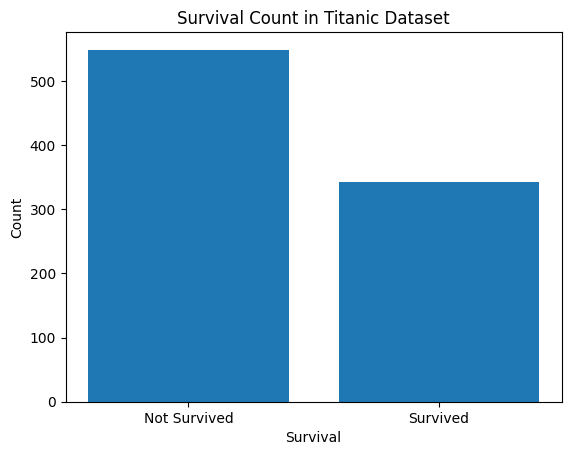

Number of who did not survive: 549
Number of survived: 342


In [49]:
survived_count = df['Survived'].value_counts()

# Defining Categories
categories = ['Not Survived', 'Survived']
values = [survived_count[0], survived_count[1]]

# Creating Bar plot
plt.bar(categories, values)

plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Count in Titanic Dataset')
plt.show()

print(f"Number of who did not survive: {survived_count[0]}")
print(f"Number of survived: {survived_count[1]}")

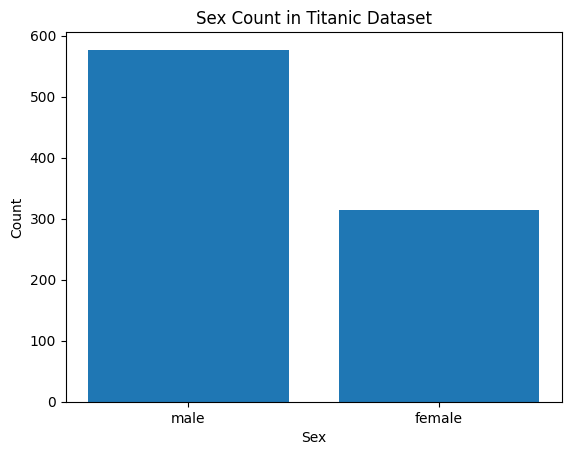

Number of Male: 577
Number of Female: 314


In [50]:
sex_count = df['Sex'].value_counts()

plt.bar(sex_count.index, sex_count.values)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex Count in Titanic Dataset')


plt.show()

print(f"Number of Male: {sex_count['male']}")
print(f"Number of Female: {sex_count['female']}")

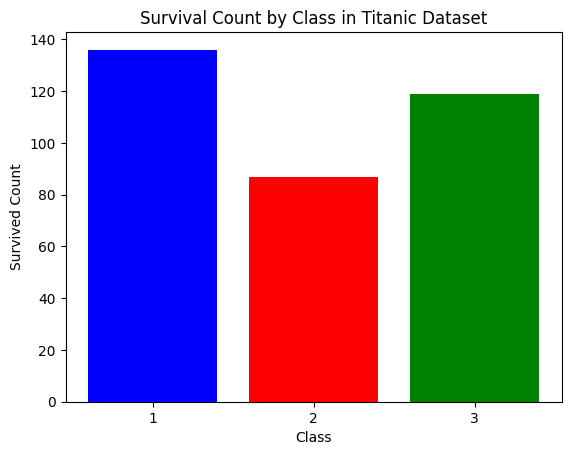

Number of Survived in first Class: 136
Number of Survived in second Class: 87
Number of Survived in third Class: 119


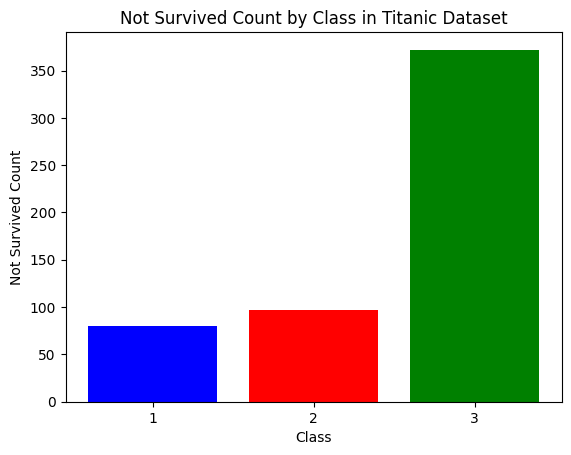

Number of Not Survived in first Class: 80
Number of Not Survived in second Class: 97
Number of Not Survived in third Class: 372


In [51]:
survived_count = df[df['Survived'] == 1]['Pclass'].value_counts()

not_survived_count = df[df['Survived'] == 0]['Pclass'].value_counts()

categories = ['1', '2', '3']

#Shows count of survivors for each passenger class, assigning a default value of 0 if there are no survivors in that class.
values = [survived_count[1], survived_count[2], survived_count[3]]

not_survived_values = [not_survived_count[1], not_survived_count[2], not_survived_count[3]]

plt.bar(categories, values, color=['blue', 'red', 'green'])

plt.xlabel('Class')
plt.ylabel('Survived Count')
plt.title('Survival Count by Class in Titanic Dataset')
plt.show()

print(f"Number of Survived in first Class: {values[0]}")
print(f"Number of Survived in second Class: {values[1]}")
print(f"Number of Survived in third Class: {values[2]}")

plt.bar(categories, not_survived_values, color=['blue', 'red', 'green'])

plt.xlabel('Class')
plt.ylabel('Not Survived Count')
plt.title('Not Survived Count by Class in Titanic Dataset')
plt.show()

print(f"Number of Not Survived in first Class: {not_survived_values[0]}")
print(f"Number of Not Survived in second Class: {not_survived_values[1]}")
print(f"Number of Not Survived in third Class: {not_survived_values[2]}")

## Preprocessing

In [52]:
#checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


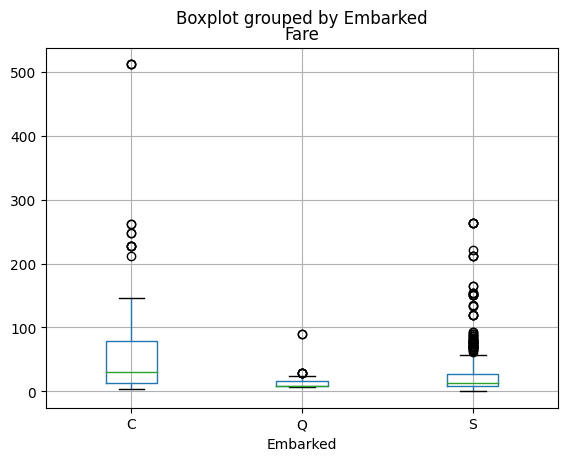

In [54]:
df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [55]:
# Drop rows where 'Embarked' is missing
df = df.dropna(subset=['Embarked'])


In [60]:
# List of columns to drop
columns_to_drop = ['Cabin', 'Ticket']  # Example columns; adjust based on your analysis

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Separate features and target variable
X = df.drop('Survived', axis=1)
Y = df['Survived']

# Define numerical and categorical columns
numerical_cols = ['Age', 'Fare']
categorical_cols = ['Pclass', 'Sex', 'Embarked']

# Preprocessing for numerical data: impute missing values and scale features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Split the preprocessed dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_preprocessed, Y, test_size=0.3, random_state=101)

# Output the shapes of the splits to verify
print("Training set features shape:", X_train.shape)
print("Test set features shape:", X_test.shape)
print("Training set labels shape:", Y_train.shape)
print("Test set labels shape:", Y_test.shape)


Training set features shape: (622, 10)
Test set features shape: (267, 10)
Training set labels shape: (622,)
Test set labels shape: (267,)


# Logistic Regression

In [62]:
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, Y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Calculate accuracy
accuracy_logreg = accuracy_score(Y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg:.4f}')

# Calculate recall
recall_logreg = recall_score(Y_test, y_pred_logreg)
print(f'Logistic Regression Recall: {recall_logreg:.4f}')

# Calculate precision
precision_logreg = precision_score(Y_test, y_pred_logreg)
print(f'Logistic Regression Precision: {precision_logreg:.4f}')

# Calculate F1 score
f1_logreg = f1_score(Y_test, y_pred_logreg)
print(f'Logistic Regression F1 Score: {f1_logreg:.4f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_logreg)
print(f'Logistic Regression Confusion Matrix:\n{conf_matrix}')

# For a detailed classification report
report = classification_report(Y_test, y_pred_logreg)
print(f'Logistic Regression Classification Report:\n{report}')


Logistic Regression Accuracy: 0.8052
Logistic Regression Recall: 0.6731
Logistic Regression Precision: 0.7955
Logistic Regression F1 Score: 0.7292
Logistic Regression Confusion Matrix:
[[145  18]
 [ 34  70]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       163
           1       0.80      0.67      0.73       104

    accuracy                           0.81       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.81      0.80       267



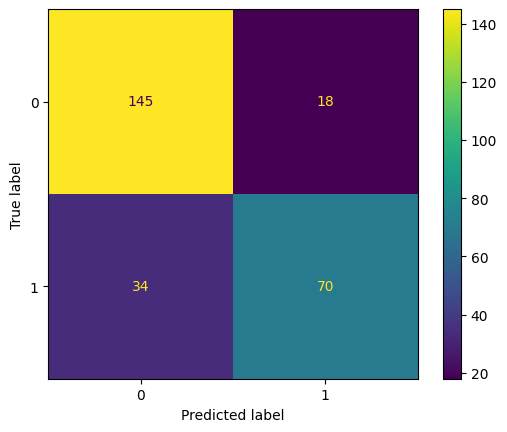

In [66]:
cmd=ConfusionMatrixDisplay(conf_matrix)
cmd.plot()
plt.show()

# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN model with a chosen number of neighbors (e.g., 5)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [68]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

In [69]:
# Calculate accuracy
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.4f}')

# Calculate recall
recall_knn = recall_score(Y_test, y_pred_knn)
print(f'KNN Recall: {recall_knn:.4f}')

# Calculate precision
precision_knn = precision_score(Y_test, y_pred_knn)
print(f'KNN Precision: {precision_knn:.4f}')

# Calculate F1 score
f1_knn = f1_score(Y_test, y_pred_knn)
print(f'KNN F1 Score: {f1_knn:.4f}')

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(Y_test, y_pred_knn)
print(f'KNN Confusion Matrix:\n{conf_matrix_knn}')

# For a detailed classification report
report_knn = classification_report(Y_test, y_pred_knn)
print(f'KNN Classification Report:\n{report_knn}')


KNN Accuracy: 0.8315
KNN Recall: 0.7981
KNN Precision: 0.7757
KNN F1 Score: 0.7867
KNN Confusion Matrix:
[[139  24]
 [ 21  83]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       163
           1       0.78      0.80      0.79       104

    accuracy                           0.83       267
   macro avg       0.82      0.83      0.82       267
weighted avg       0.83      0.83      0.83       267



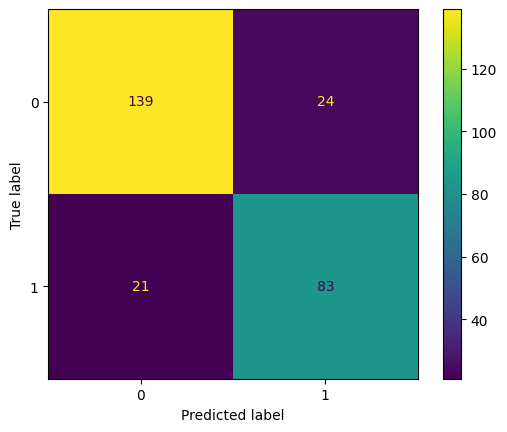

In [70]:
cmd=ConfusionMatrixDisplay(conf_matrix_knn)
cmd.plot()
plt.show()

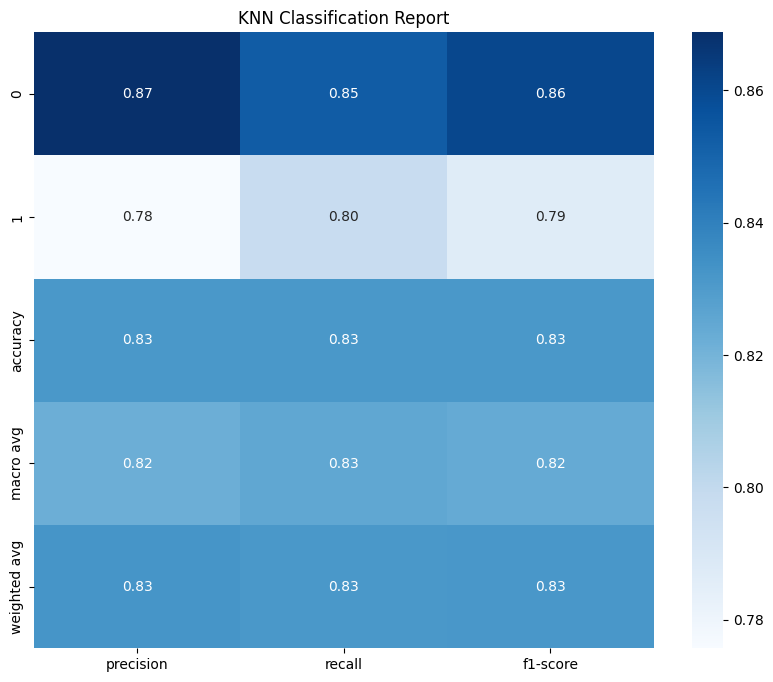

In [71]:
# Convert the classification report to a DataFrame for plotting
report_knn_df = pd.DataFrame(classification_report(Y_test, y_pred_knn, output_dict=True)).transpose()

# Plot the classification report
plt.figure(figsize=(10, 8))
sns.heatmap(report_knn_df[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('KNN Classification Report')
plt.show()


# Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the Naive Bayes model
nb = GaussianNB()

# Train the model
nb.fit(X_train, Y_train)

GaussianNB()

In [73]:
# Make predictions on the test set
y_pred_nb = nb.predict(X_test)


In [74]:
# Calculate accuracy
accuracy_nb = accuracy_score(Y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.4f}')

# Calculate recall
recall_nb = recall_score(Y_test, y_pred_nb)
print(f'Naive Bayes Recall: {recall_nb:.4f}')

# Calculate precision
precision_nb = precision_score(Y_test, y_pred_nb)
print(f'Naive Bayes Precision: {precision_nb:.4f}')

# Calculate F1 score
f1_nb = f1_score(Y_test, y_pred_nb)
print(f'Naive Bayes F1 Score: {f1_nb:.4f}')

# Calculate confusion matrix
conf_matrix_nb = confusion_matrix(Y_test, y_pred_nb)
print(f'Naive Bayes Confusion Matrix:\n{conf_matrix_nb}')

# For a detailed classification report
report_nb = classification_report(Y_test, y_pred_nb)
print(f'Naive Bayes Classification Report:\n{report_nb}')


Naive Bayes Accuracy: 0.7865
Naive Bayes Recall: 0.7115
Naive Bayes Precision: 0.7327
Naive Bayes F1 Score: 0.7220
Naive Bayes Confusion Matrix:
[[136  27]
 [ 30  74]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       163
           1       0.73      0.71      0.72       104

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



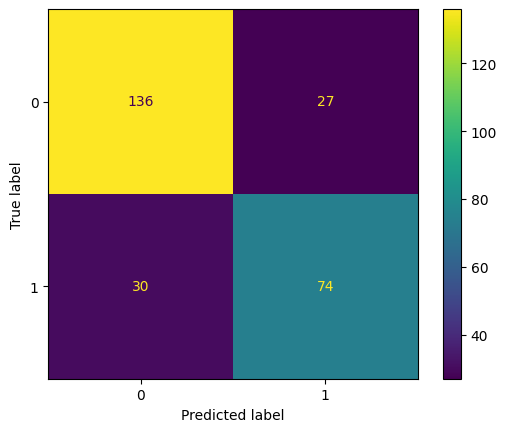

In [75]:
cmd=ConfusionMatrixDisplay(conf_matrix_nb)
cmd.plot()
plt.show()

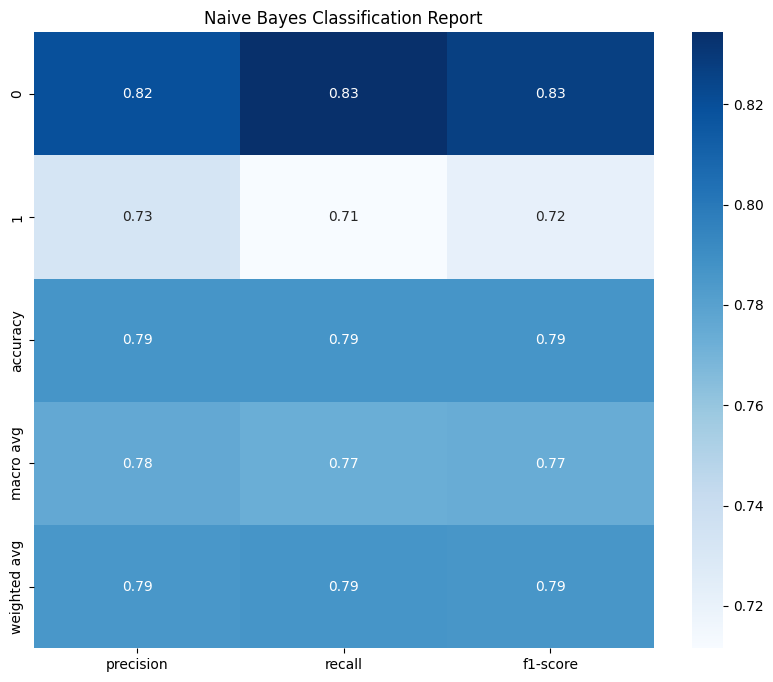

In [76]:
# Convert the classification report to a DataFrame for plotting
report_nb_df = pd.DataFrame(classification_report(Y_test, y_pred_nb, output_dict=True)).transpose()

# Plot the classification report
plt.figure(figsize=(10, 8))
sns.heatmap(report_nb_df[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Naive Bayes Classification Report')
plt.show()


# SVM: Support Vector Machine

In [77]:
from sklearn.svm import SVC

# Instantiate the SVM model with a chosen kernel (e.g., 'linear', 'rbf')
svm = SVC(kernel='linear', random_state=101)

# Train the model
svm.fit(X_train, Y_train)


SVC(kernel='linear', random_state=101)

In [78]:
# Make predictions on the test set
y_pred_svm = svm.predict(X_test)


In [79]:
# Calculate accuracy
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.4f}')

# Calculate recall
recall_svm = recall_score(Y_test, y_pred_svm)
print(f'SVM Recall: {recall_svm:.4f}')

# Calculate precision
precision_svm = precision_score(Y_test, y_pred_svm)
print(f'SVM Precision: {precision_svm:.4f}')

# Calculate F1 score
f1_svm = f1_score(Y_test, y_pred_svm)
print(f'SVM F1 Score: {f1_svm:.4f}')

# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(Y_test, y_pred_svm)
print(f'SVM Confusion Matrix:\n{conf_matrix_svm}')

# For a detailed classification report
report_svm = classification_report(Y_test, y_pred_svm)
print(f'SVM Classification Report:\n{report_svm}')


SVM Accuracy: 0.7903
SVM Recall: 0.6538
SVM Precision: 0.7727
SVM F1 Score: 0.7083
SVM Confusion Matrix:
[[143  20]
 [ 36  68]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       163
           1       0.77      0.65      0.71       104

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



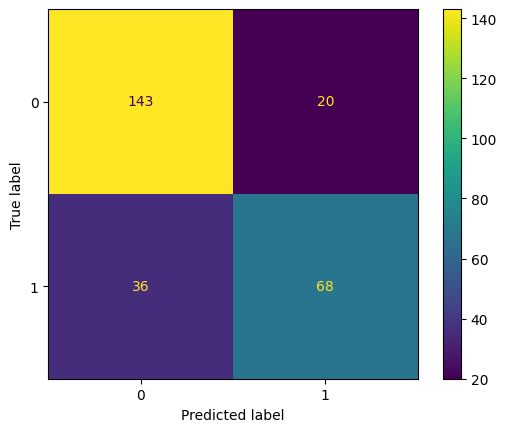

In [80]:
cmd=ConfusionMatrixDisplay(conf_matrix_svm)
cmd.plot()
plt.show()

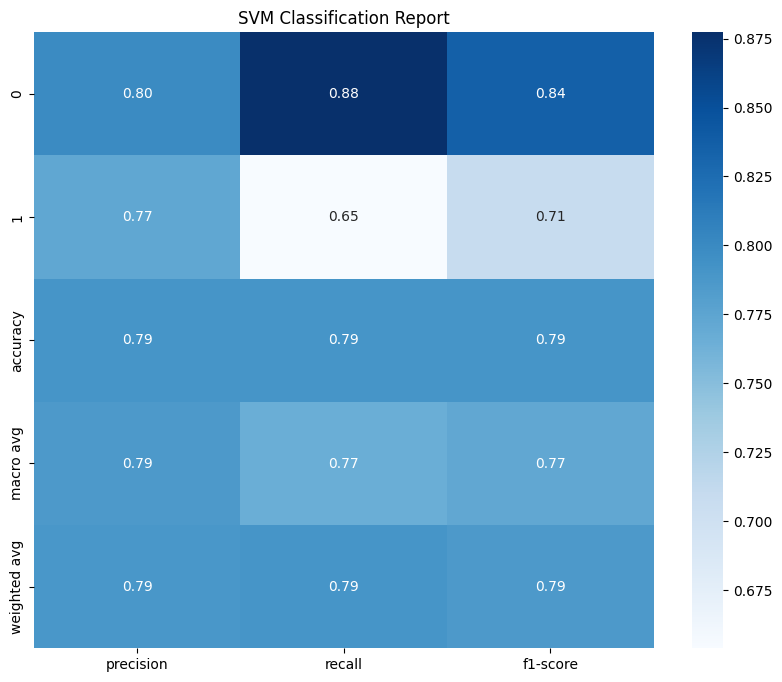

In [81]:
# Convert the classification report to a DataFrame for plotting
report_svm_df = pd.DataFrame(classification_report(Y_test, y_pred_svm, output_dict=True)).transpose()

# Plot the classification report
plt.figure(figsize=(10, 8))
sns.heatmap(report_svm_df[['precision', 'recall', 'f1-score']], annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('SVM Classification Report')
plt.show()
